In [1]:
import os
import cv2
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:

original_dataset_dir = r'D:\MV\CHC6781_Machine_Vision\data\all'  
base_dir = r'D:\MV\CHC6781_Machine_Vision\data\splitData' 
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [4]:

os.makedirs(base_dir, exist_ok=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [5]:

train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

Split dataset

In [10]:
for category in os.listdir(original_dataset_dir):
    category_dir = os.path.join(original_dataset_dir, category)
    
    if os.path.isdir(category_dir):
        os.makedirs(os.path.join(train_dir, category), exist_ok=True)
        os.makedirs(os.path.join(validation_dir, category), exist_ok=True)
        os.makedirs(os.path.join(test_dir, category), exist_ok=True)

        images = os.listdir(category_dir)
        np.random.shuffle(images)

        train_count = int(train_ratio * len(images))
        validation_count = int(validation_ratio * len(images))

        for i, img in enumerate(images):
            src = os.path.join(category_dir, img)
            if i < train_count:
                dst = os.path.join(train_dir, category, img)
            elif i < train_count + validation_count:
                dst = os.path.join(validation_dir, category, img)
            else:
                dst = os.path.join(test_dir, category, img)
            shutil.copyfile(src, dst)


In [2]:

# datagen = ImageDataGenerator(
#     rescale=1.0/255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [20]:

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128), 
    batch_size=16,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128), 
    batch_size=32,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  
    batch_size=8,
    class_mode='categorical'
)


Found 454 images belonging to 2 classes.
Found 97 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


In [18]:
def augment_images(image_data_generator, image_path, save_dir, num_augmented_images=5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    image = cv2.resize(image, (128, 128))  
    image = np.expand_dims(image, axis=0)  

  
    base_image_name = os.path.basename(image_path).split('.')[0]


    for i in range(num_augmented_images):
        augmented_image = image_data_generator.flow(image, batch_size=1).next()[0]
      
        augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)
   
        augmented_image_filename = f"{base_image_name}_aug_{i}.png"
        save_image_path = os.path.join(save_dir, augmented_image_filename)
        cv2.imwrite(save_image_path, augmented_image * 255)  



augmented_images_dir = r'D:\MV\CHC6781_Machine_Vision\data\augmented_images'

for dataset in ['train', 'validation']:
    dataset_dir = os.path.join(base_dir, dataset)
    augmented_dataset_dir = os.path.join(augmented_images_dir, dataset)  
    os.makedirs(augmented_dataset_dir, exist_ok=True)  
    for category in os.listdir(dataset_dir):
        category_dir = os.path.join(dataset_dir, category)
        save_category_dir = os.path.join(augmented_dataset_dir, category) 
        os.makedirs(save_category_dir, exist_ok=True)  

        images = os.listdir(category_dir)
        num_augmented_images = 5 if category == 'Glaucoma_Negative' else 14  

        for img_name in images:
            img_path = os.path.join(category_dir, img_name)
            augment_images(datagen, img_path, save_category_dir, num_augmented_images=num_augmented_images)



Image Enhancement Contrast

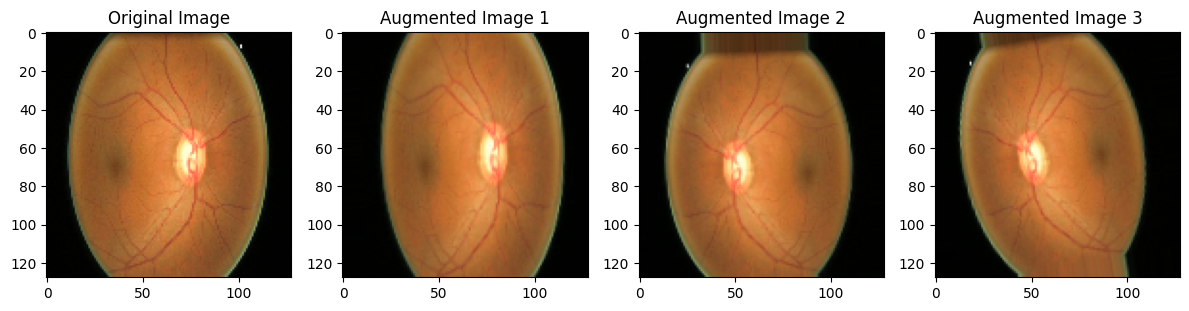

In [6]:
import matplotlib.pyplot as plt

def show_image_augmentation(original_img_path, data_generator, num_augmented=3):

    original_image = cv2.imread(original_img_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    original_image_resized = cv2.resize(original_image, (128, 128))


    plt.figure(figsize=(12, 6))
    plt.subplot(1, num_augmented + 1, 1)
    plt.imshow(original_image_resized)
    plt.title("Original Image")
    

    image = np.expand_dims(original_image_resized, axis=0)
    for i in range(num_augmented):
        augmented_image = data_generator.flow(image, batch_size=1).next()[0]
        plt.subplot(1, num_augmented + 1, i + 2)
        plt.imshow(augmented_image)
        plt.title(f"Augmented Image {i+1}")

    plt.tight_layout()
    plt.show()


glaucoma_negative_dir = r'D:\MV\CHC6781_Machine_Vision\data\all\Glaucoma_Negative'
first_image_path = os.path.join(glaucoma_negative_dir, os.listdir(glaucoma_negative_dir)[0])


show_image_augmentation(first_image_path, datagen)